In [1]:
#First import all the libraries we will be using for analysis:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pathlib import Path
from pandas.api.types import CategoricalDtype
#and for plotting graphs:
import matplotlib.pyplot as plt
import seaborn as sns
#and set up the figure parameters
plt.rcParams['figure.figsize'] = [12, 7]
sns.set()

In [2]:
# Import the database into a dataframe
data_file =('Clean_GGI_WPS_EPI.xlsx')
df_GGI_WPS = pd.read_excel(data_file, index_col=0)

In [3]:
df_GGI_WPS.head()

,Region,Year 2020 GGI,Country.1,WPS 2019,country,EPI.new,Country.2,GII 2018,country.1,CCH.new,GHP.new,EPI.change,CCH.change,GHP.change
Country,,,,,,,,,,,,,,
Afghanistan,Middle East,999.000,Afghanistan,0.373,Afghanistan,25.5,Afghanistan,0.575,Afghanistan,22.2,100.0,5.0,7.3,0.0
Albania,Europe,0.769,Albania,0.759,Albania,49.0,Albania,0.234,Albania,56.8,58.3,10.2,14.7,-6.0
Algeria,Africa,0.634,Algeria,0.611,Algeria,44.8,Algeria,0.443,Algeria,52.5,44.6,0.5,-5.9,0.6
Angola,Africa,0.660,Angola,0.626,Angola,29.7,Angola,0.578,Angola,49.0,60.3,5.3,22.4,7.9
Antigua and Barbuda,North America,999.000,Antigua and Barbuda,999.000,Antigua and Barbuda,48.5,Antigua and Barbuda,999.000,Antigua and Barbuda,58.5,35.2,3.3,12.4,-0.3


In [4]:
display(stats.normaltest(df_GGI_WPS['Year 2020 GGI'], nan_policy = 'omit'))
display(stats.shapiro(df_GGI_WPS['Year 2020 GGI'],))
display(stats.anderson(df_GGI_WPS['Year 2020 GGI'],))
display(stats.normaltest(df_GGI_WPS['WPS 2019'], nan_policy = 'omit'))
display(stats.shapiro(df_GGI_WPS['WPS 2019'],))
display(stats.anderson(df_GGI_WPS['WPS 2019'],))

NormaltestResult(statistic=36.5391894279877, pvalue=1.1630967149399514e-08)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.9  , 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

NormaltestResult(statistic=99.17423378827603, pvalue=2.914665761735279e-22)

ShapiroResult(statistic=0.37277257442474365, pvalue=3.51485974265922e-25)

AndersonResult(statistic=60.07571273544505, critical_values=array([0.564, 0.643, 0.771, 0.9  , 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [5]:
df_GGI_WPS['Year 2020 GGI'].replace(to_replace=[999], value=np.nan, inplace=True)
df_GGI_WPS['WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


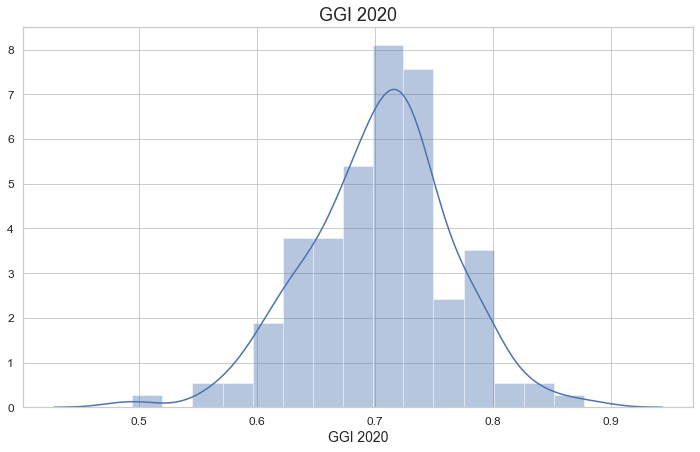

In [6]:
sns.set_style("whitegrid")
ax = sns.distplot(df_GGI_WPS['Year 2020 GGI'])
ax.set_title("GGI 2020", fontsize=18)
ax.set_xlabel("GGI 2020", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.tick_params(labelsize=12)
sns.set_palette("bright")
plt.show()

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


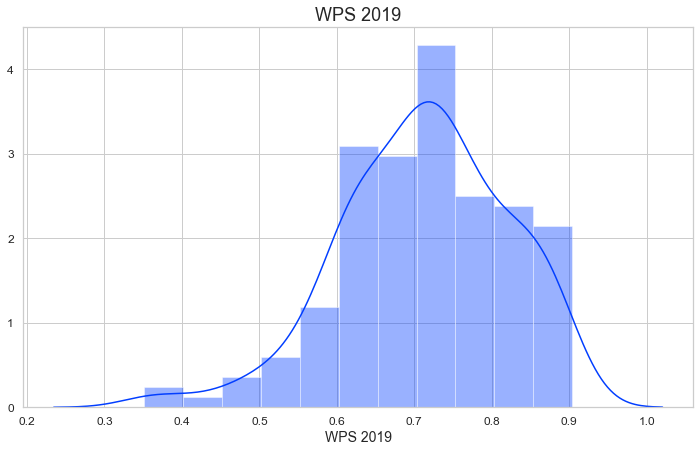

In [7]:
sns.set_style("whitegrid")
ax = sns.distplot(df_GGI_WPS['WPS 2019'])
ax.set_title("WPS 2019", fontsize=18)
ax.set_xlabel("WPS 2019", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.tick_params(labelsize=12)
sns.set_palette("bright")
plt.show()

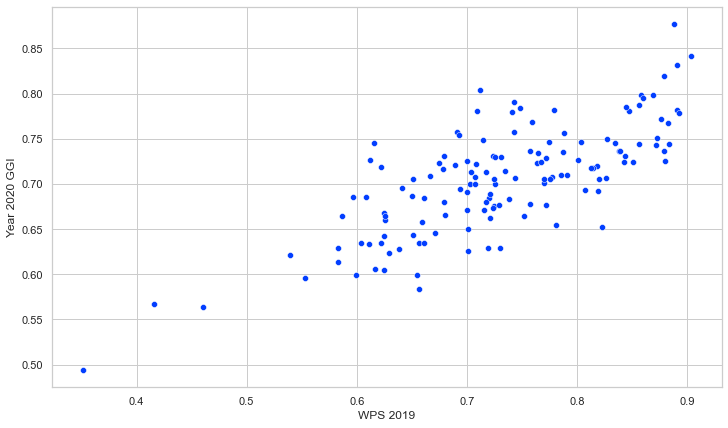

In [8]:
ax = sns.scatterplot(x = 'WPS 2019', y = 'Year 2020 GGI', data=df_GGI_WPS)
plt.show()

In [9]:
stats.spearmanr(df_GGI_WPS['WPS 2019'], df_GGI_WPS['Year 2020 GGI'], nan_policy = 'omit')

SpearmanrResult(correlation=0.6966724468537214, pvalue=1.6785396869096553e-21)

In [10]:
display(stats.normaltest(df_GGI_WPS['EPI.new'], nan_policy = 'omit'))
display(stats.shapiro(df_GGI_WPS['EPI.new'],))
display(stats.anderson(df_GGI_WPS['EPI.new'],))

NormaltestResult(statistic=189.9863137680385, pvalue=5.5589932500402045e-42)

ShapiroResult(statistic=0.27730268239974976, pvalue=1.1366749168624046e-26)

AndersonResult(statistic=57.49300741297458, critical_values=array([0.564, 0.643, 0.771, 0.9  , 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [11]:
df_GGI_WPS['EPI.new'].replace(to_replace=[999], value=np.nan, inplace=True)

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


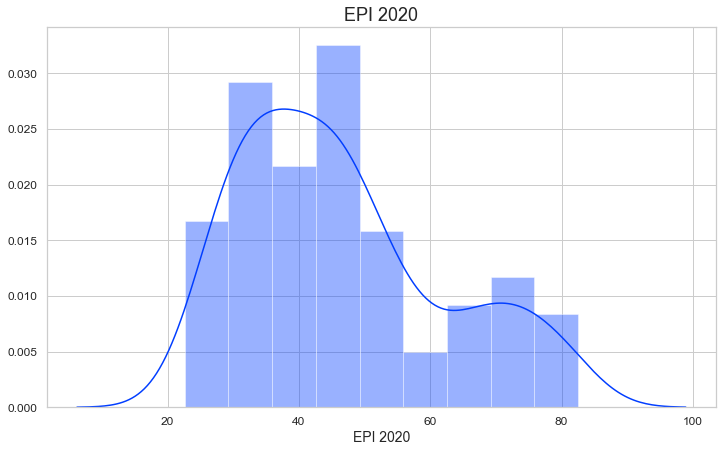

In [12]:
sns.set_style("whitegrid")
ax = sns.distplot(df_GGI_WPS['EPI.new'])
ax.set_title("EPI 2020", fontsize=18)
ax.set_xlabel("EPI 2020", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.tick_params(labelsize=12)
sns.set_palette("bright")
plt.show()

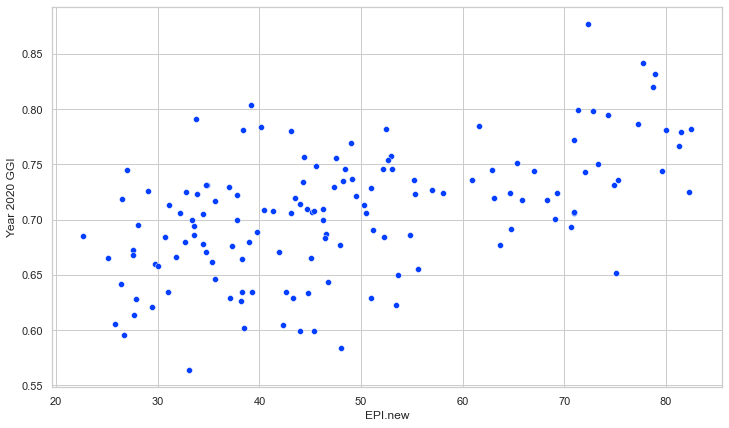

In [13]:
ax = sns.scatterplot(x = 'EPI.new', y = 'Year 2020 GGI', data=df_GGI_WPS)
plt.show()

In [14]:
stats.spearmanr(df_GGI_WPS['Year 2020 GGI'], df_GGI_WPS['EPI.new'], nan_policy = 'omit')

SpearmanrResult(correlation=0.5153893914409955, pvalue=6.174751931321327e-11)

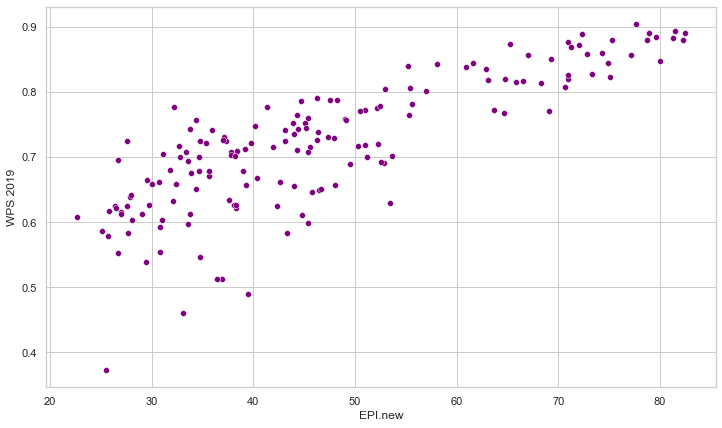

In [15]:
ax = sns.scatterplot(x = 'EPI.new', color = 'purple',
                     y = 'WPS 2019',
                     data=df_GGI_WPS)
plt.show()

In [16]:
stats.spearmanr(df_GGI_WPS['WPS 2019'], df_GGI_WPS['EPI.new'], nan_policy = 'omit')

SpearmanrResult(correlation=0.8139842514052362, pvalue=2.394120208155351e-39)

In [17]:
df_GGI_WPS.describe

<bound method NDFrame.describe of                              Region  Year 2020 GGI            Country.1  \
Country                                                                   
 Afghanistan            Middle East            NaN          Afghanistan   
 Albania                     Europe          0.769              Albania   
 Algeria                     Africa          0.634              Algeria   
 Angola                      Africa          0.660               Angola   
Antigua and Barbuda   North America            NaN  Antigua and Barbuda   
...                             ...            ...                  ...   
 Venezuela            South America          0.713           Venezuela    
 Vietnam             Southeast Asia          0.700             Viet Nam   
 Yemen                  Middle East          0.494                Yemen   
 Zambia                      Africa          0.731               Zambia   
 Zimbabwe                    Africa          0.730             Zim

In [18]:
df_GGI_WPS['GII 2018'].describe

<bound method NDFrame.describe of Country
 Afghanistan             0.575
 Albania                 0.234
 Algeria                 0.443
 Angola                  0.578
Antigua and Barbuda    999.000
                        ...   
 Venezuela               0.458
 Vietnam                 0.314
 Yemen                   0.834
 Zambia                  0.540
 Zimbabwe                0.525
Name: GII 2018, Length: 189, dtype: float64>

In [19]:
df_GGI_WPS['GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)

In [20]:
df_GGI_WPS['GII 2018'].describe

<bound method NDFrame.describe of Country
 Afghanistan           0.575
 Albania               0.234
 Algeria               0.443
 Angola                0.578
Antigua and Barbuda      NaN
                       ...  
 Venezuela             0.458
 Vietnam               0.314
 Yemen                 0.834
 Zambia                0.540
 Zimbabwe              0.525
Name: GII 2018, Length: 189, dtype: float64>

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


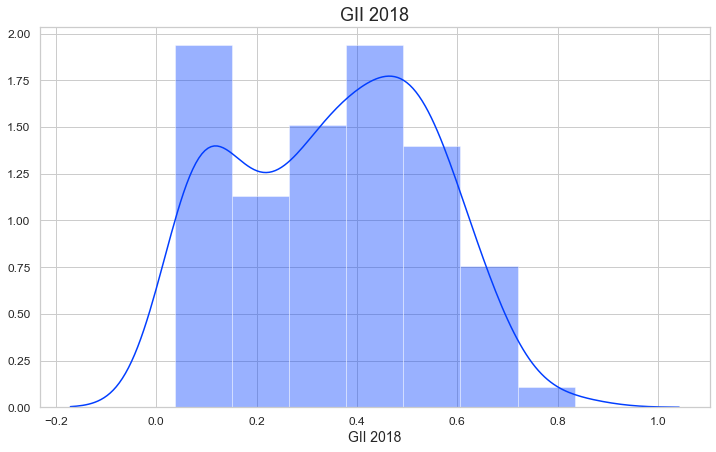

In [21]:
sns.set_style("whitegrid")
ax = sns.distplot(df_GGI_WPS['GII 2018'])
ax.set_title("GII 2018", fontsize=18)
ax.set_xlabel("GII 2018", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.tick_params(labelsize=12)
sns.set_palette("bright")
plt.show()

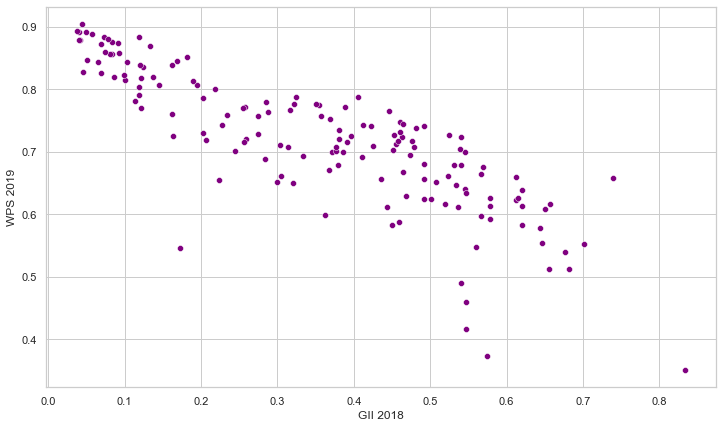

In [22]:
ax = sns.scatterplot(x = 'GII 2018', color = 'purple',
                     y = 'WPS 2019',
                     data=df_GGI_WPS)
plt.show()

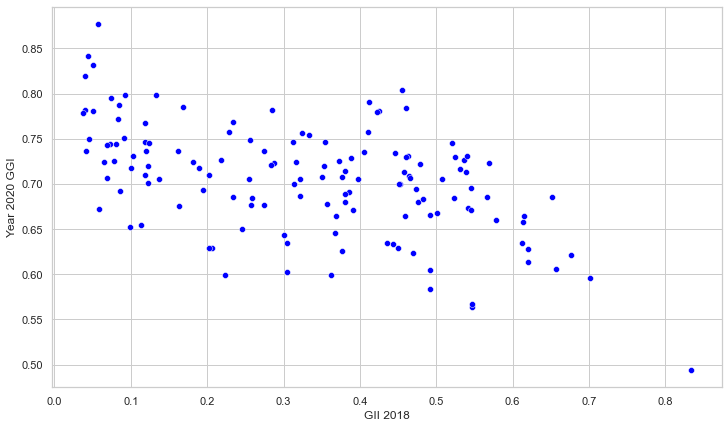

In [23]:
ax = sns.scatterplot(x = 'GII 2018', color = 'blue',
                     y = 'Year 2020 GGI',
                     data=df_GGI_WPS)
plt.show()

In [24]:
stats.spearmanr(df_GGI_WPS['Year 2020 GGI'], df_GGI_WPS['GII 2018'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.4902700254777795, pvalue=7.820276917788098e-10)

In [25]:
stats.spearmanr(df_GGI_WPS['WPS 2019'], df_GGI_WPS['GII 2018'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.8528249126046654, pvalue=9.754679336372436e-45)

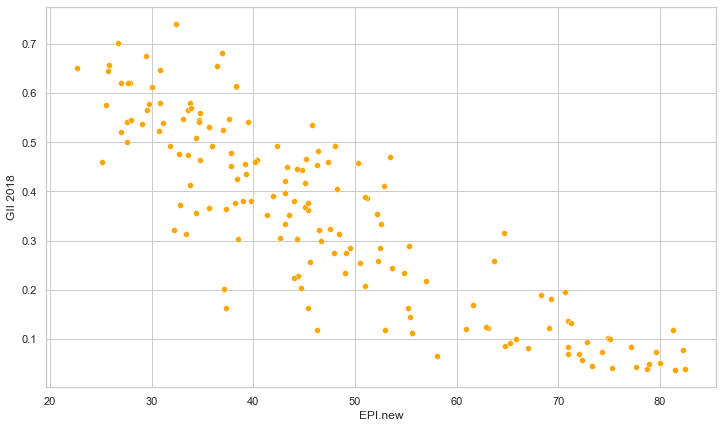

In [26]:
ax = sns.scatterplot(x = 'EPI.new', color = 'orange',
                     y = 'GII 2018',
                     data=df_GGI_WPS)
plt.show()

In [27]:
stats.spearmanr(df_GGI_WPS['GII 2018'], df_GGI_WPS['EPI.new'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.8612750530748488, pvalue=1.0043103427692282e-47)

In [28]:
g = sns.FacetGrid(data=df_GGI_WPS, col="GII 2018", hue="EPI.new")
g.map(sns.scatterplot, "GII 2018", "EPI.new", alpha=.7)
g.add_legend()

In [29]:
df_GGI_WPS['CCH.new'].replace(to_replace=[999], value=np.nan, inplace=True)
df_GGI_WPS['GHP.new'].replace(to_replace=[999], value=np.nan, inplace=True)

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


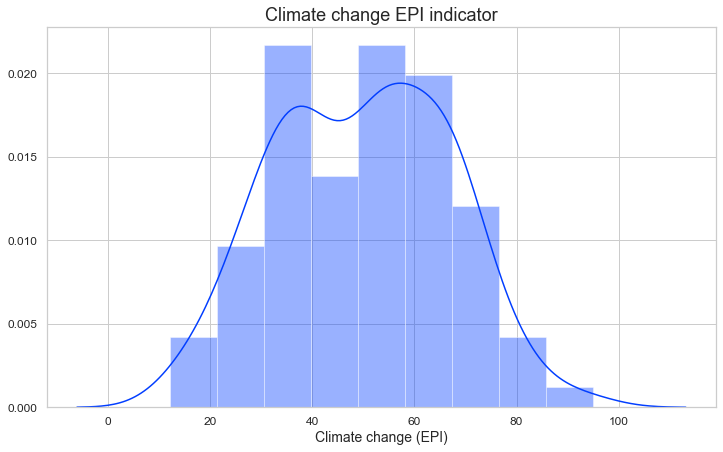

In [30]:
sns.set_style("whitegrid")
ax = sns.distplot(df_GGI_WPS['CCH.new'])
ax.set_title("Climate change EPI indicator", fontsize=18)
ax.set_xlabel("Climate change (EPI)", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.tick_params(labelsize=12)
sns.set_palette("bright")
plt.show()

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


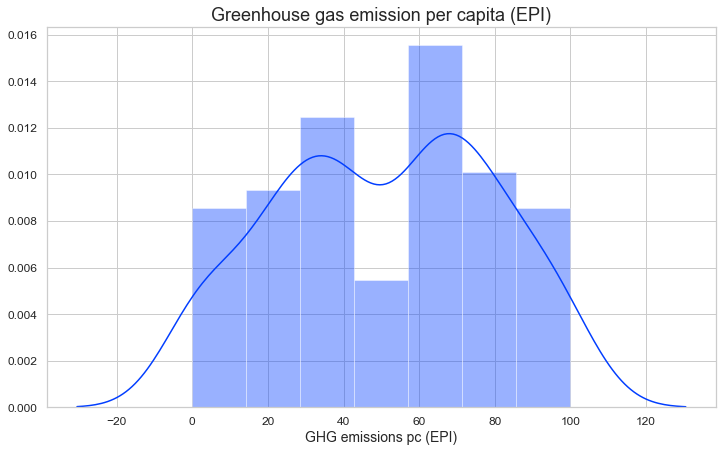

In [31]:
sns.set_style("whitegrid")
ax = sns.distplot(df_GGI_WPS['GHP.new'])
ax.set_title("Greenhouse gas emission per capita (EPI)", fontsize=18)
ax.set_xlabel("GHG emissions pc (EPI)", fontsize=14)
ax.set_ylabel("", fontsize=14)
ax.tick_params(labelsize=12)
sns.set_palette("bright")
plt.show()

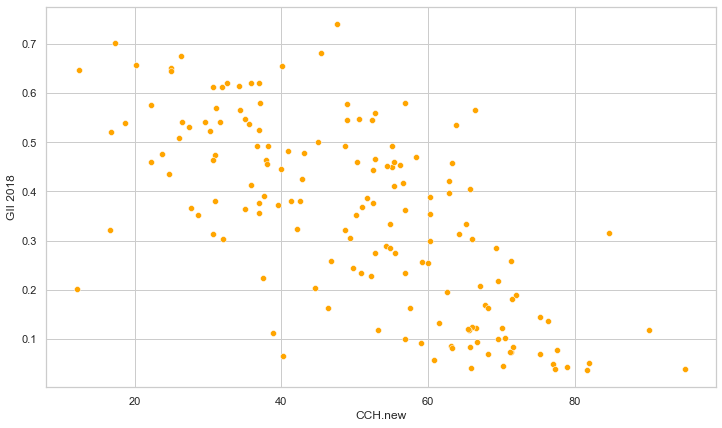

In [32]:
ax = sns.scatterplot(x = 'CCH.new', color = 'orange',
                     y = 'GII 2018',
                     data=df_GGI_WPS)
plt.show()

In [33]:
stats.spearmanr(df_GGI_WPS['GII 2018'], df_GGI_WPS['CCH.new'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.6942454908364287, pvalue=4.780801279536896e-24)

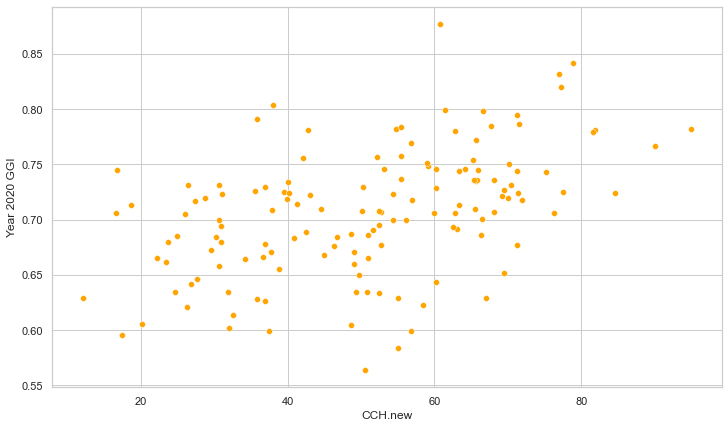

In [34]:
ax = sns.scatterplot(x = 'CCH.new', color = 'orange',
                     y = 'Year 2020 GGI',
                     data=df_GGI_WPS)
plt.show()

In [35]:
stats.spearmanr(df_GGI_WPS['Year 2020 GGI'], df_GGI_WPS['CCH.new'], nan_policy = 'omit')

SpearmanrResult(correlation=0.4881421428198709, pvalue=8.249439875382289e-10)

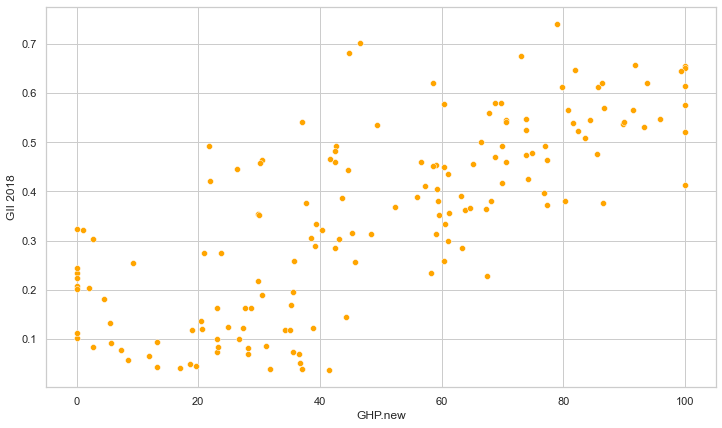

In [36]:
ax = sns.scatterplot(x = 'GHP.new', color = 'orange',
                     y = 'GII 2018',
                     data=df_GGI_WPS)
plt.show()

In [37]:
stats.spearmanr(df_GGI_WPS['GII 2018'], df_GGI_WPS['GHP.new'], nan_policy = 'omit')

SpearmanrResult(correlation=0.7686584219151261, pvalue=4.416543282721555e-32)

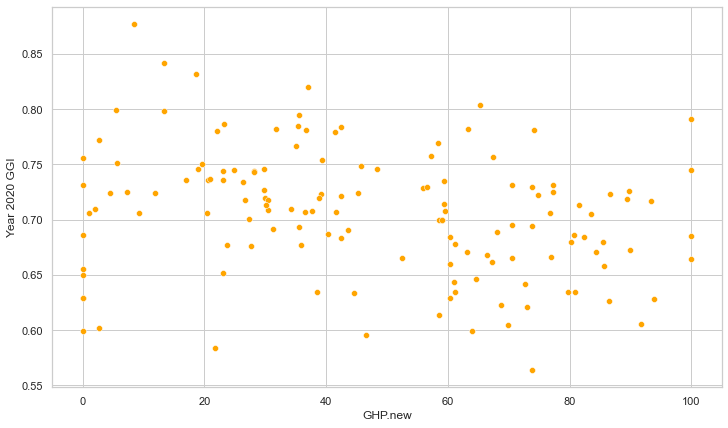

In [38]:
ax = sns.scatterplot(x = 'GHP.new', color = 'orange',
                     y = 'Year 2020 GGI',
                     data=df_GGI_WPS)
plt.show()

In [39]:
stats.spearmanr(df_GGI_WPS['Year 2020 GGI'], df_GGI_WPS['GHP.new'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.28103520837659235, pvalue=0.0007362784374201511)

Text(0.5, 0, 'EPI')

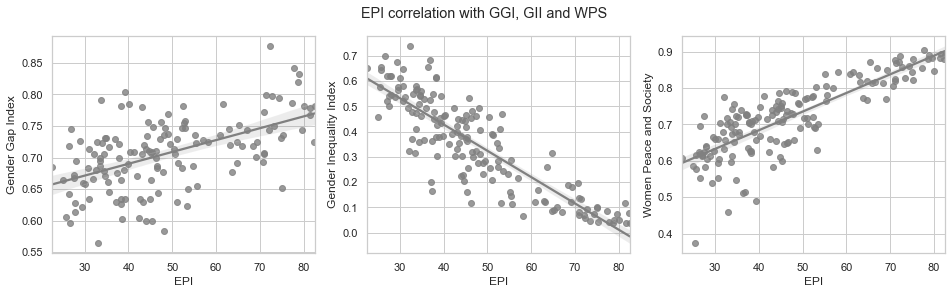

In [98]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('EPI correlation with GGI, GII and WPS')

sns.regplot(ax=ax[0], data=df_GGI_WPS, x='EPI.new', y='Year 2020 GGI', color = 'grey')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_GGI_WPS, x='EPI.new', y='GII 2018', color = 'grey')
ax[1].set_ylabel('Gender Inequality Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_GGI_WPS, x='EPI.new', y='WPS 2019', color = 'grey') 
ax[2].set_ylabel('Women Peace and Society')
ax[2].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

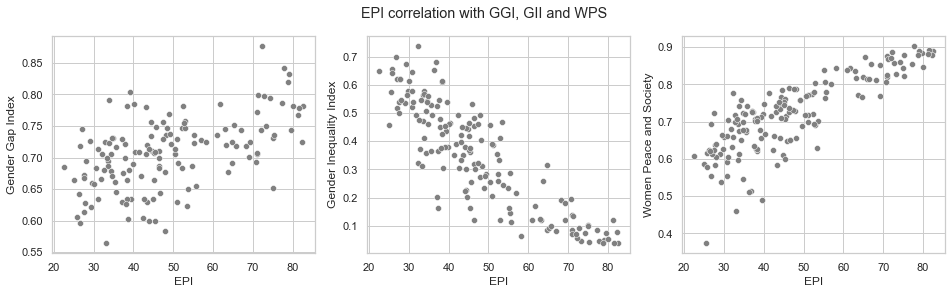

In [99]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('EPI correlation with GGI, GII and WPS')

sns.scatterplot(ax=ax[0], data=df_GGI_WPS, x='EPI.new', y='Year 2020 GGI', color = 'grey')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.scatterplot(ax=ax[1], data=df_GGI_WPS, x='EPI.new', y='GII 2018', color = 'grey')
ax[1].set_ylabel('Gender Inequality Index')
ax[1].set_xlabel('EPI')

sns.scatterplot(ax=ax[2], data=df_GGI_WPS, x='EPI.new', y='WPS 2019', color = 'grey') 
ax[2].set_ylabel('Women Peace and Society')
ax[2].set_xlabel('EPI')

In [ ]:
display(stats.normaltest(df_GGI_WPS['Year 2020 GGI'], nan_policy = 'omit'))
display(stats.shapiro(df_GGI_WPS['Year 2020 GGI'],))
display(stats.anderson(df_GGI_WPS['Year 2020 GGI'],))
display(stats.normaltest(df_GGI_WPS['WPS 2019'], nan_policy = 'omit'))
display(stats.shapiro(df_GGI_WPS['WPS 2019'],))
display(stats.anderson(df_GGI_WPS['WPS 2019'],))